In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dataset = pd.read_csv("Experience-Salary.csv")
print(dataset.head())
print(dataset.shape)

   exp(in months)  salary(in thousands)
0       18.290293             16.521825
1       17.023407             11.666234
2       26.343613             23.167255
3       19.105834             20.877145
4       27.742516             23.166236
(1000, 2)


In [20]:
X = dataset["exp(in months)"].values.reshape(-1,1)
Y = dataset["salary(in thousands)"].values

In [ ]:
mean_x = np.mean(X)
print(f"Mean of X: {mean_x}")
mean_y = np.mean(Y)
print(f"Mean of Y: {mean_y}")

n = len(X)

numerator = 0
denominator = 0

for i in range(n):
    numerator += (X[i] - mean_x) * (Y[i] - mean_y)
    print(f"Numerator after index {i}: {numerator}")
    denominator += (X[i] - mean_x) ** 2
    print(f"Denominator after index {i}: {denominator}")
b1 = numerator / denominator
b0 = mean_y - b1 * mean_x
print(f"Coefficients:\nb0 = {b0}\nb1 = {b1}")

Mean of X: 26.15782467853106
Mean of Y: 26.722597279127935
Numerator after index 0: [80.25489655]
Denominator after index 0: [61.8980497]
Numerator after index 1: [217.78601463]
Denominator after index 1: [145.33564167]
Numerator after index 2: [217.12547178]
Denominator after index 2: [145.37015915]
Numerator after index 3: [258.34754452]
Denominator after index 3: [195.10073349]
Numerator after index 4: [252.71180752]
Denominator after index 4: [197.61198155]
Numerator after index 5: [287.13523341]
Denominator after index 5: [228.00897264]
Numerator after index 6: [423.94981088]
Denominator after index 6: [371.32401421]
Numerator after index 7: [448.24910273]
Denominator after index 7: [385.57479266]
Numerator after index 8: [483.73887366]
Denominator after index 8: [430.24400066]
Numerator after index 9: [487.76675696]
Denominator after index 9: [430.75672028]
Numerator after index 10: [664.73338103]
Denominator after index 10: [666.5629414]
Numerator after index 11: [640.86821242]


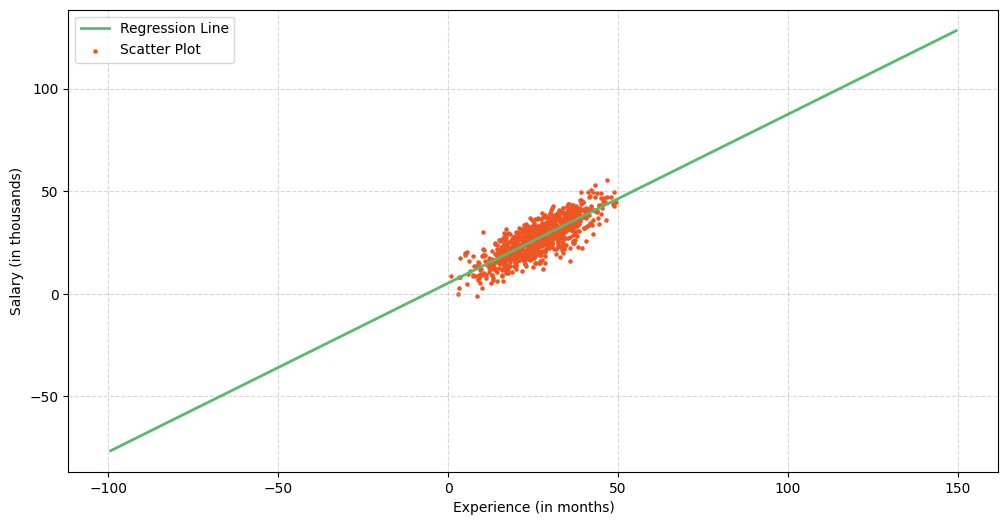

In [47]:
# plotting the regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.figure(figsize=(12, 6))  # wider figure
plt.plot(x, y, color="#58b970", label="Regression Line", linewidth=2)
# Ploting Scatter Points
plt.scatter(X, Y, c="#ef5423", label="Scatter Plot", s=5)

plt.xlabel("Experience (in months)")
plt.ylabel("Salary (in thousands)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [33]:
ss_t = 0
ss_r = 0

for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2_score = 1 - (ss_r / ss_t)
print(f"R2 Score: {r2_score}")

R2 Score: [0.6576712]


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((n, 1))
# Creating the model
reg = LinearRegression()

# Fitting the model
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating R2 score
r2_score = reg.score(X, Y)

print(f"R2 Score (using sklearn): {r2_score}")

R2 Score (using sklearn): 0.6576711967581765


In [56]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# For regression problem with Experience-Salary dataset
array = dataset.values
X_reg = array[:, 0:1]  # Experience column
Y_reg = array[:, 1]    # Salary column
validation_size = 0.20
seed = 6
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X_reg, Y_reg, test_size=validation_size, random_state=seed
)

Ah! This is a **common point of confusion**. Let me explain carefully.

---

### 🔹 Why You **can’t use `accuracy`** for regression

1. **Accuracy is for classification**, not regression.

   * Classification predicts **categories or classes**, e.g., `"Setosa"` vs `"Versicolor"` vs `"Virginica"`
   * Accuracy = fraction of **correct predictions**

2. **Regression predicts continuous numbers**, e.g., salary, brain weight, house price

   * Numbers are rarely exactly equal to the true value
   * Example:

     * True salary = 50,000
     * Predicted salary = 50,001 → is “wrong” if you used accuracy → meaningless

3. **Regression uses different metrics**, such as:

   | Metric                              | Purpose                                       |
   | ----------------------------------- | --------------------------------------------- |
   | `neg_mean_squared_error`            | Penalizes large deviations, common in sklearn |
   | `mean_absolute_error`               | Measures average absolute error               |
   | `r2` (coefficient of determination) | How much variance in Y is explained by X      |

---

### 🔹 Summary

* **Classification → discrete labels → use `accuracy`**
* **Regression → continuous numbers → use MSE, MAE, R², etc.**
* That’s why in your **Salary vs Experience** example, we used:

```python
scoring = "neg_mean_squared_error"
```

✅ It tells the model: “Minimize the squared error between predicted and actual values.”

---


In [64]:
seed = 6
scoring = "neg_mean_squared_error"

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Spot-checking regression algorithms
models = []
models.append(("LR", LinearRegression()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("CART", DecisionTreeRegressor()))
models.append(("SVR", SVR()))
models.append(("RF", RandomForestRegressor()))


# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    print("{}: {:.4f} ({:.4f})".format(name, cv_results.mean(), cv_results.std()))

LR: -27.9758 (3.5195)
KNN: -33.3886 (4.4438)
CART: -54.7162 (11.1675)
SVR: -29.1837 (3.8736)
RF: -40.2360 (6.9209)


| Task Type          | Example Problem                               | Metric                      | Description                                                       |
| ------------------ | --------------------------------------------- | --------------------------- | ----------------------------------------------------------------- |
| **Classification** | Iris species, spam detection                  | `accuracy`                  | Fraction of correctly predicted classes                           |
|                    |                                               | `precision`                 | How many predicted positives are actually positive                |
|                    |                                               | `recall`                    | How many actual positives were correctly predicted                |
|                    |                                               | `f1-score`                  | Harmonic mean of precision & recall                               |
| **Regression**     | Salary prediction, brain weight, house prices | `neg_mean_squared_error`    | Penalizes large errors; used in scikit-learn cross-validation     |
|                    |                                               | `mean_squared_error (MSE)`  | Average of squared differences between predicted and true values  |
|                    |                                               | `mean_absolute_error (MAE)` | Average of absolute differences between predicted and true values |
|                    |                                               | `r2_score`                  | How much variance in Y is explained by X (1 = perfect fit)        |
